# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather"

api_keys = weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = f"{url}?q={city}&appid={api_keys}"
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1
    
    try:
        response = requests.get(city_url)
        
        if response.status_code == 200:
            city_weather = response.json()
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | siklos
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | al khawr
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | tranovaho
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | kulia village
Processing Record 20 of Set 1 | al ghayzah
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | hithadhoo
Processing Rec

In [4]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,siklos,45.8550,18.2975,280.49,75,0,2.06,HU,1708571586
1,katsuura,35.1333,140.3000,279.16,89,100,10.89,JP,1708571437
2,al khawr,25.7667,51.3167,290.26,62,0,4.72,QA,1708571586
3,albany,42.6001,-73.9662,273.38,71,29,0.89,US,1708571446
4,waitangi,-43.9535,-176.5597,289.16,79,46,3.13,NZ,1708571330


In [6]:
city_data_df.to_csv('city_weather_data.csv', index=False)


In [7]:
city_data_df = pd.read_csv("city_weather_data.csv")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,siklos,45.8550,18.2975,280.49,75,0,2.06,HU,1708571586
1,katsuura,35.1333,140.3000,279.16,89,100,10.89,JP,1708571437
2,al khawr,25.7667,51.3167,290.26,62,0,4.72,QA,1708571586
3,albany,42.6001,-73.9662,273.38,71,29,0.89,US,1708571446
4,waitangi,-43.9535,-176.5597,289.16,79,46,3.13,NZ,1708571330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

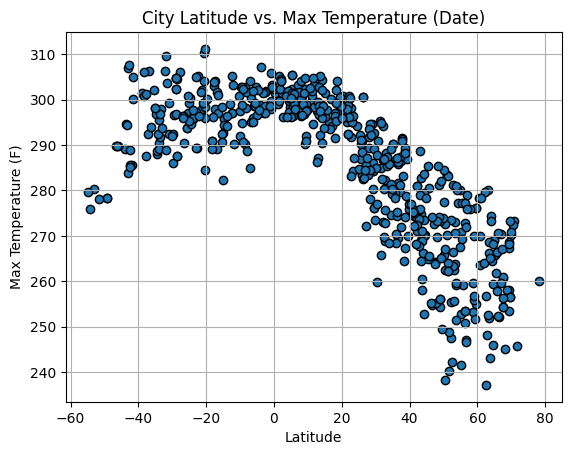

In [8]:
os.makedirs("output_data", exist_ok=True)

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (Date)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()


#### Latitude Vs. Humidity

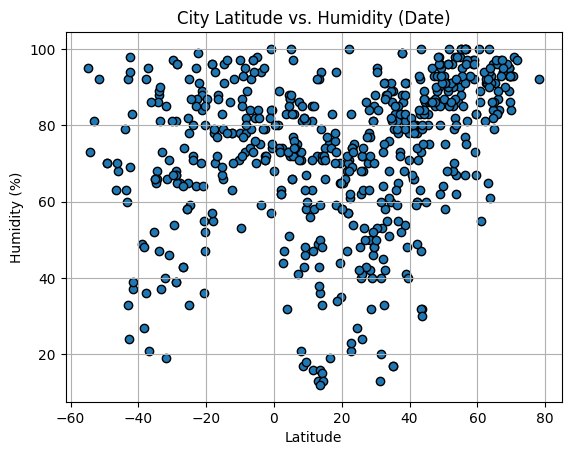

In [9]:
import matplotlib.pyplot as plt

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

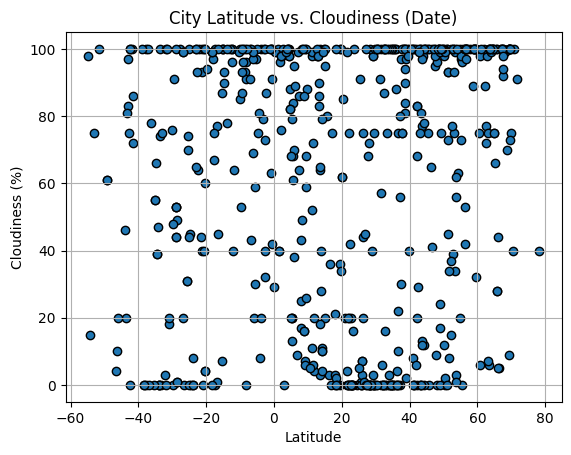

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (Date)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()


#### Latitude vs. Wind Speed Plot

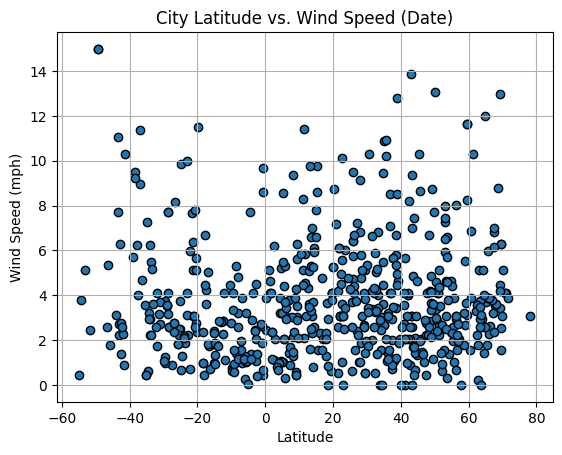

In [11]:
import matplotlib.pyplot as plt

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (Date)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, fig_name=None):
    """
    Function to compute linear regression and plot the data.

    Parameters:
    - x_values: Values for the x-axis.
    - y_values: Values for the y-axis.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - title: Title of the plot.
    - fig_name (optional): Name of the file to save the plot. If not provided, the plot will be displayed but not saved.
    """
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {rvalue**2:.2f}"

    plt.scatter(x_values, y_values)

    plt.plot(x_values, regress_values, "r-")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.annotate(line_eq, xy=(1.05, 0.85), xycoords='axes fraction', fontsize=12, color="red")

    if fig_name:
        plt.savefig(fig_name)

    plt.show()


In [13]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,siklos,45.8550,18.2975,280.49,75,0,2.06,HU,1708571586
1,katsuura,35.1333,140.3000,279.16,89,100,10.89,JP,1708571437
2,al khawr,25.7667,51.3167,290.26,62,0,4.72,QA,1708571586
3,albany,42.6001,-73.9662,273.38,71,29,0.89,US,1708571446
5,udachny,66.4167,112.4000,252.15,84,5,2.63,RU,1708571587


In [14]:
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,waitangi,-43.9535,-176.5597,289.16,79,46,3.13,NZ,1708571330
7,port elizabeth,-33.9180,25.5701,290.55,88,0,2.24,ZA,1708571588
8,margaret river,-33.9500,115.0667,295.54,47,0,6.23,AU,1708571588
9,lebu,-37.6167,-73.6500,287.49,92,100,4.00,CL,1708571589
10,grytviken,-54.2811,-36.5092,275.94,73,15,3.79,GS,1708571589


###  Temperature vs. Latitude Linear Regression Plot

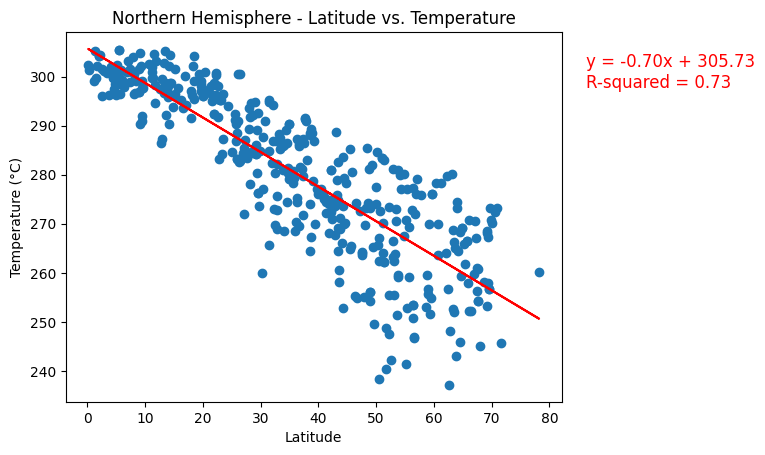

In [15]:
north_latitudes = northern_hemi_df['Lat']
north_temperatures = northern_hemi_df['Max Temp']

plot_linear_regression(north_latitudes, north_temperatures, "Latitude", "Temperature (°C)", "Northern Hemisphere - Latitude vs. Temperature")


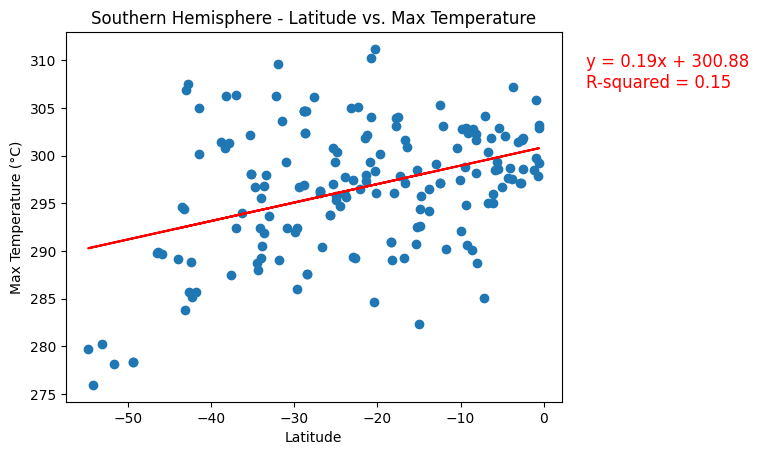

In [16]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Latitude vs. Max Temperature")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

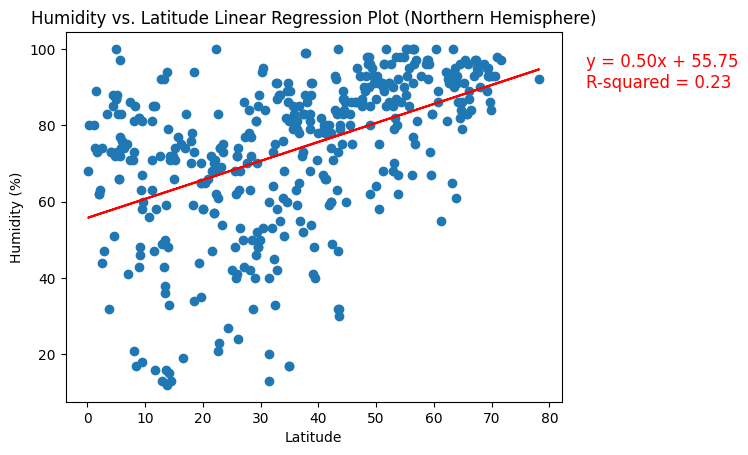

In [17]:
northern_df = city_data_df[city_data_df['Lat'] >= 0]
northern_humidity = northern_df['Humidity']
northern_latitude = northern_df['Lat']

southern_df = city_data_df[city_data_df['Lat'] < 0]
southern_humidity = southern_df['Humidity']
southern_latitude = southern_df['Lat']

plot_linear_regression(northern_latitude, northern_humidity, "Latitude", "Humidity (%)", "Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)")

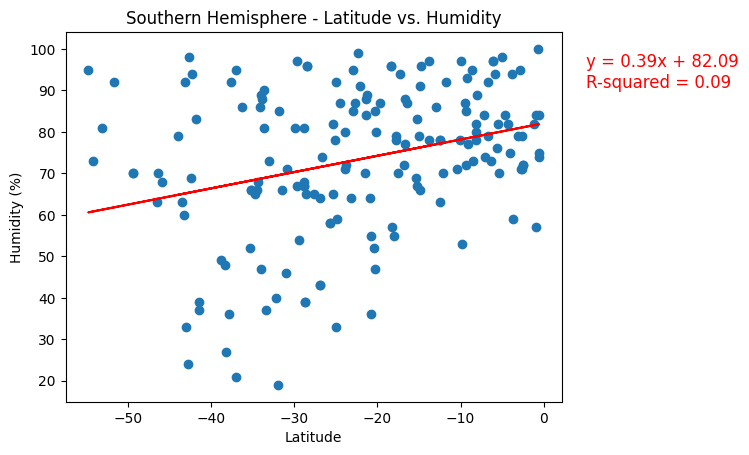

In [18]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Latitude vs. Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

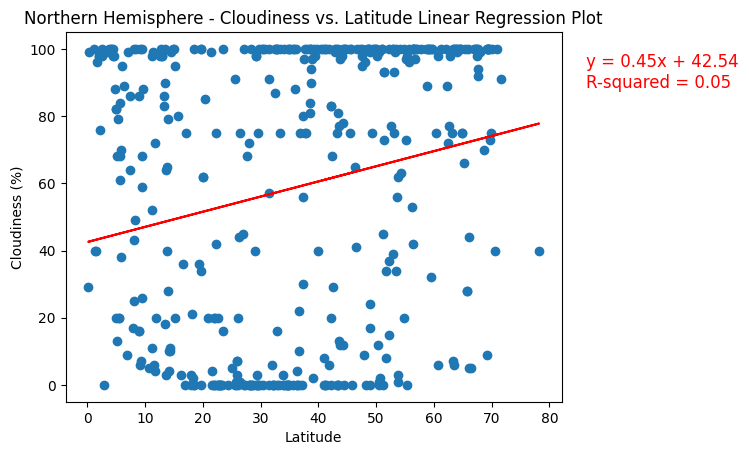

In [19]:
north_cloudiness = northern_hemi_df["Cloudiness"]
north_latitude = northern_hemi_df["Lat"]

south_cloudiness = southern_hemi_df["Cloudiness"]
south_latitude = southern_hemi_df["Lat"]

plot_linear_regression(north_latitude, north_cloudiness, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")



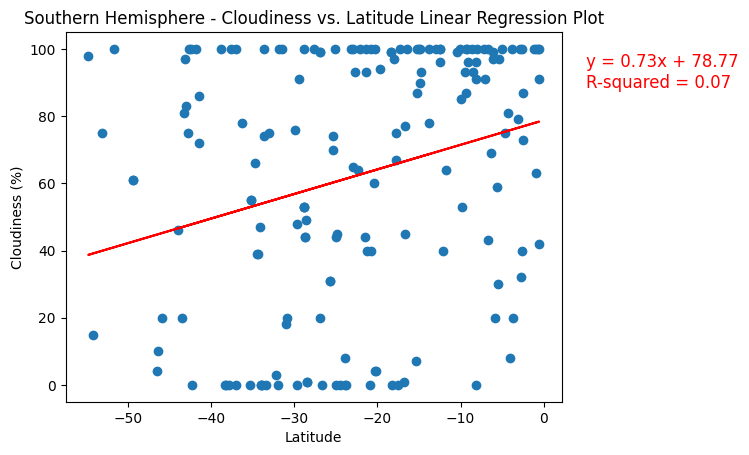

In [20]:
plot_linear_regression(south_latitude, south_cloudiness, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

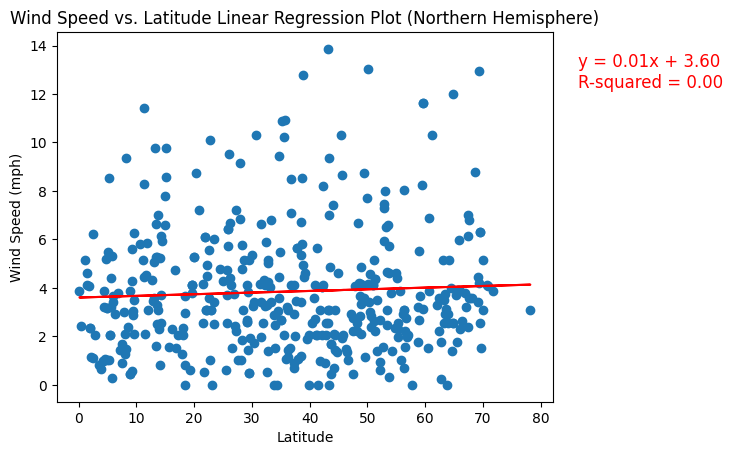

In [21]:
northern_df = city_data_df[city_data_df['Lat'] >= 0]

northern_latitudes = northern_df['Lat']
northern_wind_speed = northern_df['Wind Speed']

plot_linear_regression(northern_latitudes, northern_wind_speed, "Latitude", "Wind Speed (mph)", "Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)")


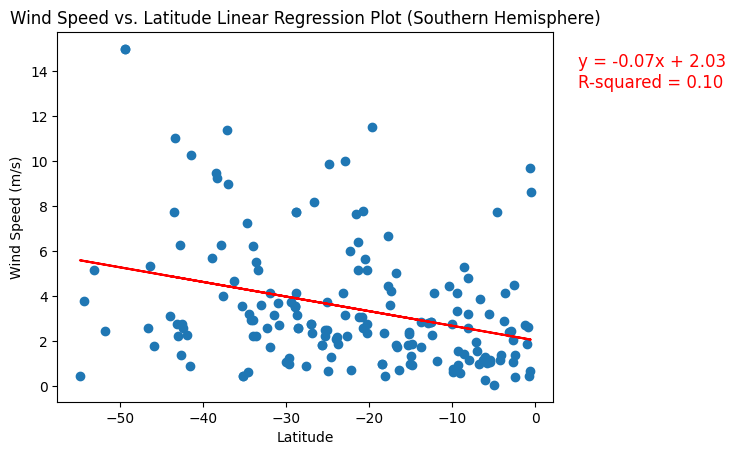

In [22]:
southern_df = city_data_df[city_data_df['Lat'] < 0]

southern_latitudes = southern_df['Lat']
southern_wind_speed = southern_df['Wind Speed']

plot_linear_regression(southern_latitudes, southern_wind_speed, "Latitude", "Wind Speed (m/s)", "Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE